In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# reading all data
value = pd.read_csv("AP Statistics Day 1 Survey 2023 - 2024.csv")

# choosing data sets
print(value.columns[21])  # parent political affiliation
print(value.columns[32])  # us states been in

parentPolitics = value[
    "How would you describe the political affiliation of your parents?"
]
usStates = value["Approximately how many of the 50 United States have you been in?"]

print(parentPolitics)
print(usStates)


How would you describe the political affiliation of your parents?
Approximately how many of the 50 United States have you been in?
0              center
1              center
2              center
3      left of center
4      left of center
           ...       
76     left of center
77           far left
78    right of center
79     left of center
80             center
Name: How would you describe the political affiliation of your parents?, Length: 81, dtype: object
0      4
1      5
2      8
3     16
4     20
      ..
76    20
77     9
78     6
79    12
80    10
Name: Approximately how many of the 50 United States have you been in?, Length: 81, dtype: int64


In [4]:
# sorting into groups
# farLeft, left, center, right, farRight

# farLeft = np.array([])
left = np.array([])
center = np.array([])
right = np.array([])
# farRight = np.array([])


# farLeft = farLeft.astype('int32')
left = left.astype('int32')
center = center.astype('int32')
right = right.astype('int32')
# farRight = farLeft.astype('int32')

for x in range(80):
    # if (parentPolitics[x] == "far left"):
    #     farLeft = np.append(farLeft, int(usStates[x]))
        
    if (parentPolitics[x] == "far left" or parentPolitics[x] == "left of center"):
        left = np.append(left, int(usStates[x]))
        
    elif (parentPolitics[x] == "center"):
        center = np.append(center, int(usStates[x]))

    elif (parentPolitics[x] == "right of center" or parentPolitics[x] == "far right"):
        right = np.append(right, int(usStates[x]))
    
    # elif (parentPolitics[x] == "far right"):
    #     farRight = np.append(farRight, int(usStates[x]))


# print out
# print("farLeft")
# print(farLeft)
print("left")
print(left)
print("center")
print(center)
print("right")
print(right)
# print("farRight")
# print(farRight)


left
[16 20 15  5 12 30 15 16 15 10 24 30 12 10  7 14 17 10 20 32 17  9 15 19
 10 10 15  7 24  5 30 18  5 13 26 20  9 12]
center
[ 4  5  8 20  6 20  8 15  6 12  7 10 10 15 10 20 13 10 20  8 14 10  9 11
 15 12  9]
right
[15 17  5 12  6 12 15 10  7  8 14 18 20  6  6]


In [5]:
# make dot plots
# data is small enough and histogram feels over kill

def dotPlot (data, title):
    uniqueVals, counts = np.unique(data, return_counts=True)
    graph, axis = plt.subplots(figsize=(10, 2))

    for uniqueVal, count in zip(uniqueVals, counts):
        axis.plot([uniqueVal]*count, list(range(count)), marker='o', color='tab:blue', linestyle='')
        
    axis.spines['top'].set_visible(False)
    axis.spines['right'].set_visible(False)
    axis.spines['left'].set_visible(False)

    axis.yaxis.set_visible(False)
    axis.set_ylim(-1, max(counts))
    axis.set_xticks([0, 5, 10, 15, 20, 25, 30, 35])
    axis.set_xlabel("Number of US States Visitied")
    axis.tick_params(axis='x', length=5, pad=10)
    axis.set_title(title)



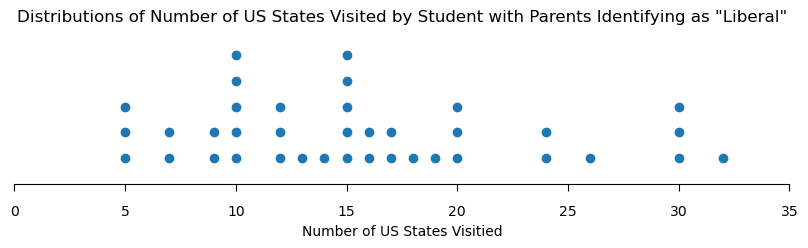

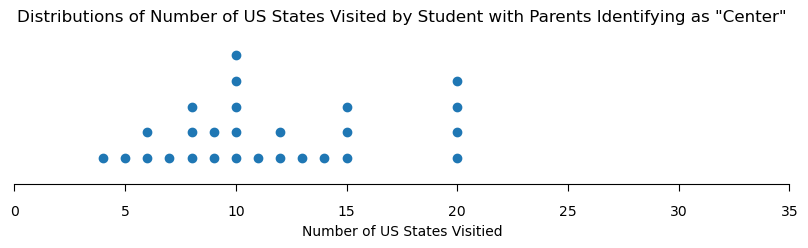

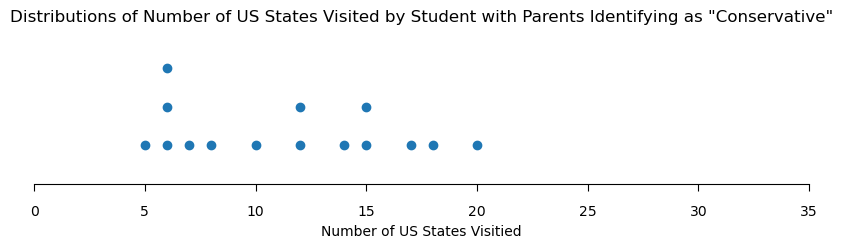

In [6]:
# dotPlot(farLeft, '''"Distributions of Number of US States Visited by Student with Parents Identifying as "Far Left"''')
dotPlot(left, '''Distributions of Number of US States Visited by Student with Parents Identifying as "Liberal"''')
dotPlot(center, '''Distributions of Number of US States Visited by Student with Parents Identifying as "Center"''')
dotPlot(right, '''Distributions of Number of US States Visited by Student with Parents Identifying as "Conservative"''')
# dotPlot(farRight, '''Distributions of Number of US States Visited by Student with Parents Affiliating with "Far Right"''')

In [7]:
def boxPlot(title, axisLabels, data, height):
    graph = plt.figure(figsize =(10, height))
    
    axis = graph.add_subplot(111)

    axis.boxplot(data, vert = 0)

    axis.set_yticklabels(axisLabels)

    axis.set_xlabel("Number of US States Visited")
    axis.set_xticks([0, 5, 10, 15, 20, 25, 30, 35])

    plt.title(title)
    plt.show()

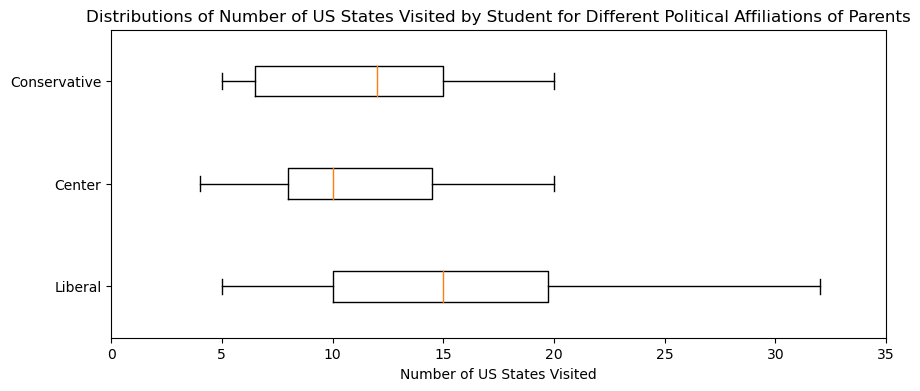

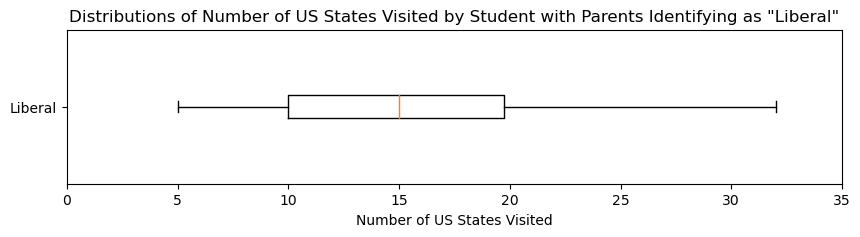

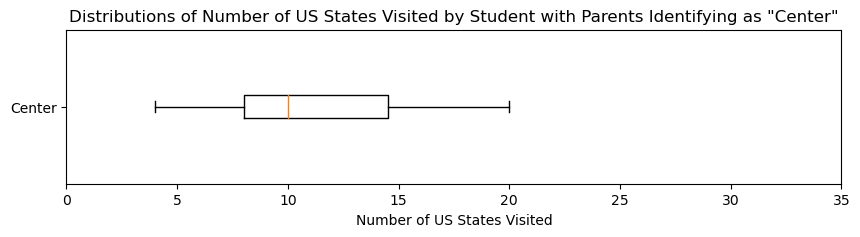

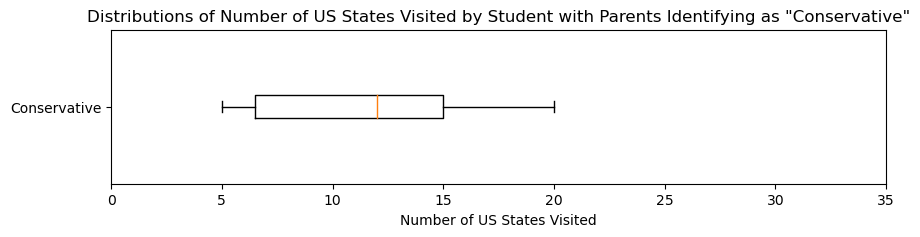

In [8]:
boxPlot("Distributions of Number of US States Visited by Student for Different Political Affiliations of Parents", ["Liberal", "Center", "Conservative"], [left, center, right], 4)
boxPlot('''Distributions of Number of US States Visited by Student with Parents Identifying as "Liberal"''', ["Liberal"], [left], 2)
boxPlot('''Distributions of Number of US States Visited by Student with Parents Identifying as "Center"''', ["Center"], [center], 2)
boxPlot('''Distributions of Number of US States Visited by Student with Parents Identifying as "Conservative"''', ["Conservative"], [right], 2)

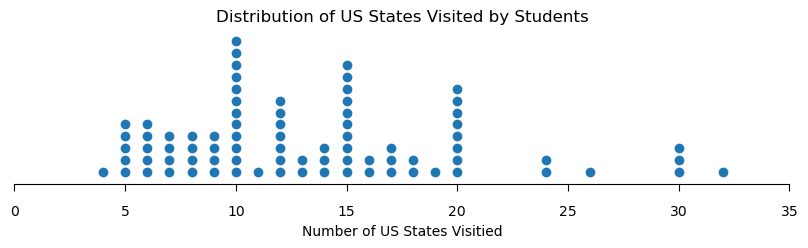

In [9]:
dotPlot(usStates, "Distribution of US States Visited by Students")

In [10]:
# percentile plot
# credit to https://matplotlib.org/mpl-probscale/tutorial/closer_look_at_viz.html

def percentilePlot (title, data):
    sortedData = np.sort(data)
    
    percentiles = np.array([])
    dataPoints = np.array([])
    for value in sortedData:
        percentiles = np.append(percentiles, stats.percentileofscore(sortedData, value, kind = 'strict'))
        dataPoints = np.append(dataPoints, value)

    plt.ylabel("Percentile (%)")
    plt.xlabel("Number of US States Visited")
    plt.yticks([0, 20, 40, 60, 80, 100])
    plt.xticks([0, 4,6,8,10,12,14,16,18,20])
    

    plt.title(title)
    plt.plot(dataPoints, percentiles)
    plt.show()

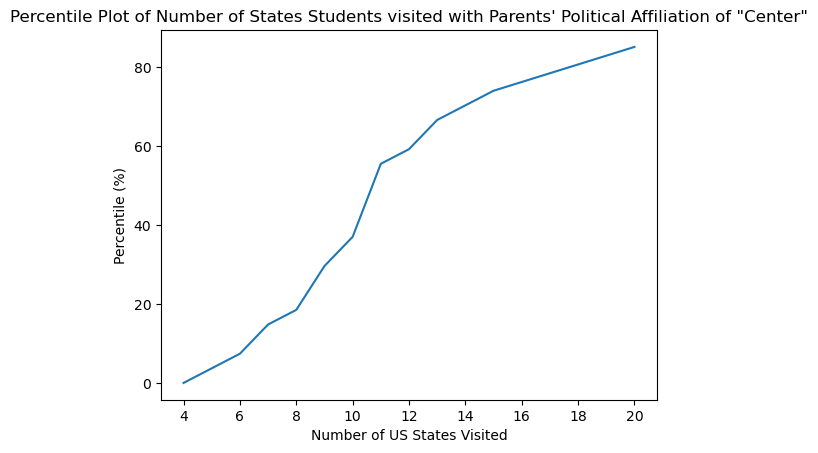

In [11]:
percentilePlot('''Percentile Plot of Number of States Students visited with Parents' Political Affiliation of "Center"''', center)

In [12]:

sortedData = np.sort(center)
percentile = stats.percentileofscore(sortedData, 13, kind = 'strict')

print (percentile)

66.66666666666667


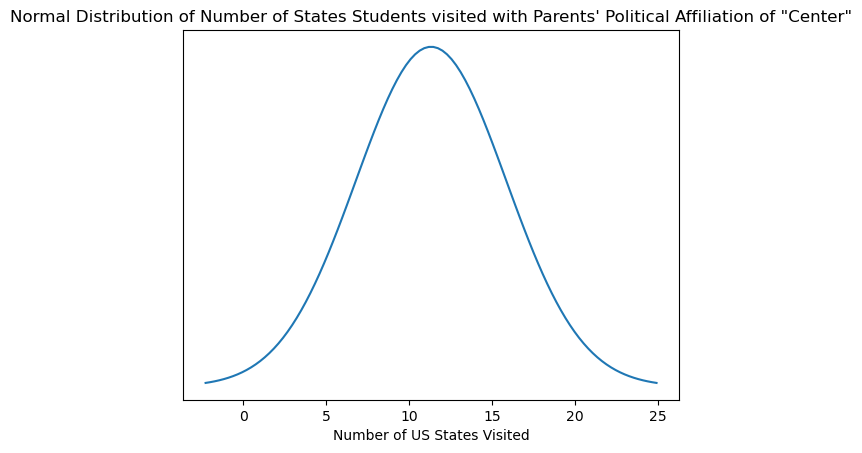

In [15]:
# normal distribution
# credit to https://stackoverflow.com/questions/10138085/how-to-plot-normal-distribution 

mean = 11.32143
sd = 4.535995
x = np.linspace(mean - 3*sd, mean + 3*sd, 100)


# plt.ylabel("Probability Density")
plt.yticks([])
plt.xlabel("Number of US States Visited")

plt.title('''Normal Distribution of Number of States Students visited with Parents' Political Affiliation of "Center"''')

plt.plot(x, stats.norm.pdf(x, mean, sd))
plt.show()

Number of States Students visited with Parents' Political Affiliation of "Center"
[ 4  5  6  6  7  8  8  8  9  9 10 10 10 10 10 11 12 12 13 14 15 15 15 20
 20 20 20]
Percentiles for Each Value
[0.03703704 0.07407407 0.12962963 0.12962963 0.18518519 0.25925926
 0.25925926 0.25925926 0.35185185 0.35185185 0.48148148 0.48148148
 0.48148148 0.48148148 0.48148148 0.59259259 0.64814815 0.64814815
 0.7037037  0.74074074 0.81481481 0.81481481 0.81481481 0.94444444
 0.94444444 0.94444444 0.94444444]
Expected Z-Scores for Each Value
[-1.78615556 -1.44610359 -1.12814365 -1.12814365 -0.89577982 -0.64563075
 -0.64563075 -0.64563075 -0.38032564 -0.38032564 -0.04643572 -0.04643572
 -0.04643572 -0.04643572 -0.04643572  0.23421919  0.38032564  0.38032564
  0.53508282  0.64563075  0.89577982  0.89577982  0.89577982  1.59321882
  1.59321882  1.59321882  1.59321882]


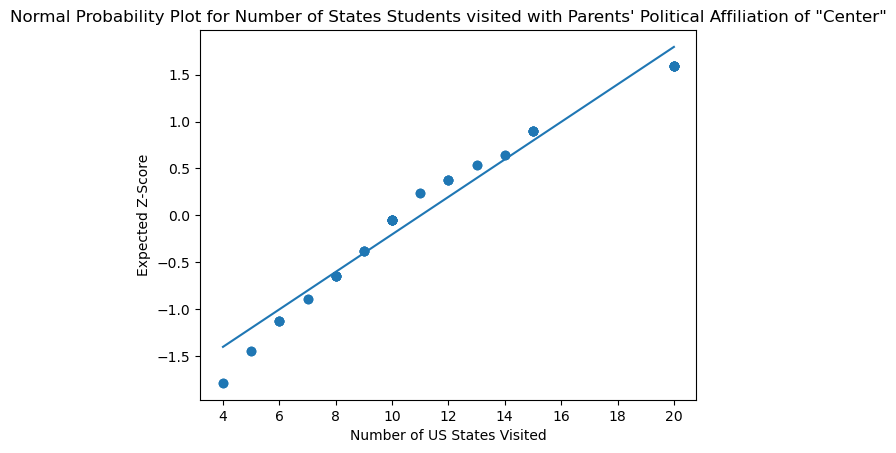

In [92]:
# making a normal probability plot

# credit to:
# https://www.geeksforgeeks.org/normal-probability-plot/
# https://stackoverflow.com/questions/20626994/how-to-calculate-the-inverse-of-the-normal-cumulative-distribution-function-in-p


center.sort()

print ('''Number of States Students visited with Parents' Political Affiliation of "Center"''')
print (center)

# calculate percentiles for each
percentiles = np.array([])

# dataPoints = np.array([])
for value in center:
    percentiles = np.append(percentiles, stats.percentileofscore(center, value) / 100) # make it decimals
    # dataPoints = np.append(dataPoints, value)

print ("Percentiles for Each Value")
print (percentiles)

# calculate z scores for each

mean = 11.32143
sd = 4.535995

# expected z score from percentile
def calcZScore (value):
    return stats.norm.ppf(value) # invNorm but for python


zScores = np.array([])
for i in range(27):
    zScores = np.append(zScores, calcZScore(percentiles[i]))


print ("Expected Z-Scores for Each Value")
print (zScores)

# plot z-score to acc values


plt.ylabel("Expected Z-Score")
plt.xlabel("Number of US States Visited")
plt.xticks([4,6,8,10,12,14,16,18,20])

plt.title('''Normal Probability Plot for Number of States Students visited with Parents' Political Affiliation of "Center"''')


plt.plot(center, zScores, marker='o', color='tab:blue', linestyle='')

#find line of best fit
a, b = np.polyfit(center, zScores, 1)

#add points to plot
plt.scatter(center, zScores)

#add line of best fit to plot
plt.plot(center, a*center+b)

# plt.plot(center, zScores, marker='o', color='tab:blue', linestyle='')